In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


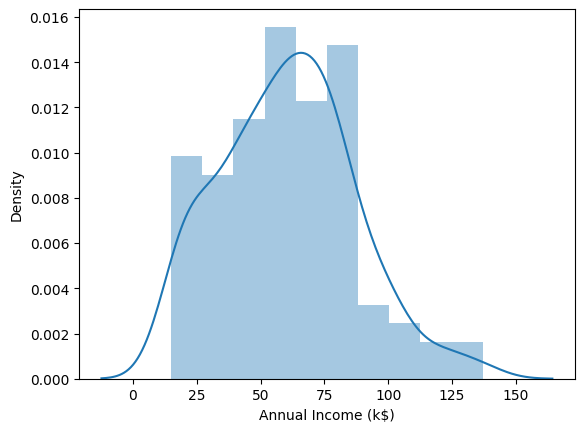

In [25]:
sns.distplot(df['Annual Income (k$)']);


In [26]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

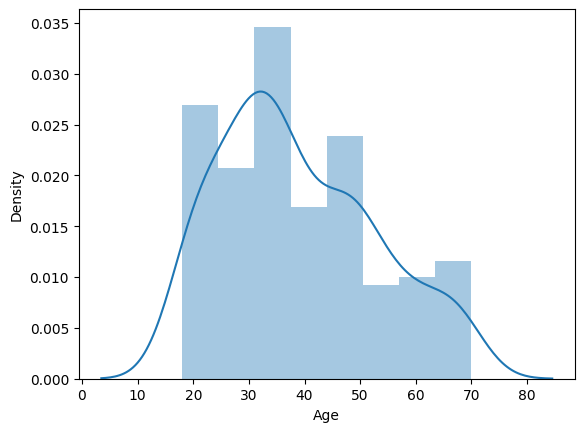

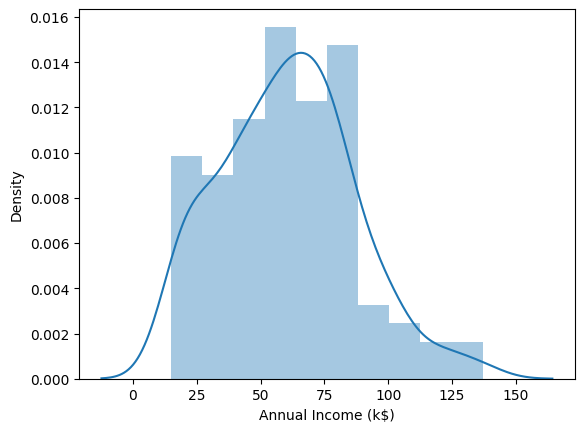

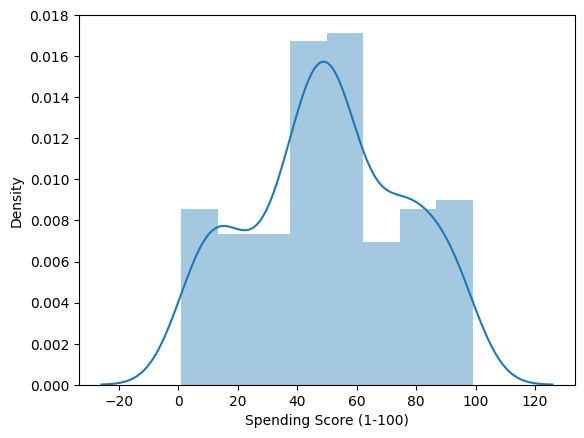

In [27]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

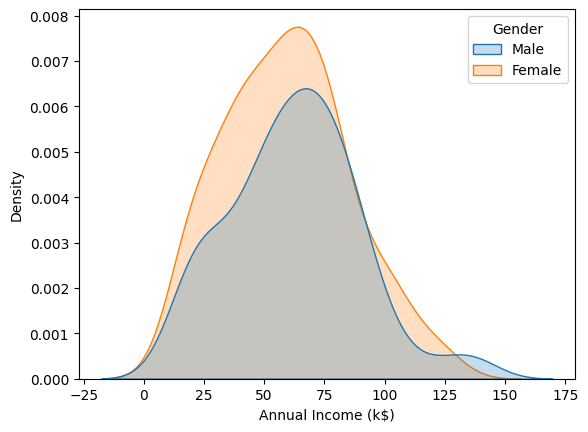

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Gender' is a categorical column in your DataFrame
sns.kdeplot(data=df, x='Annual Income (k$)', hue='Gender', shade=True)

plt.show()


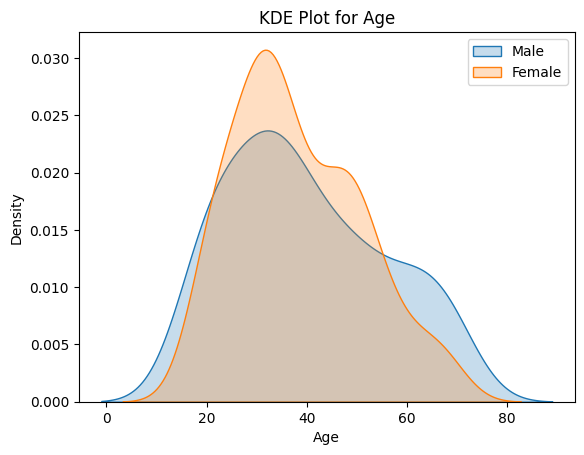

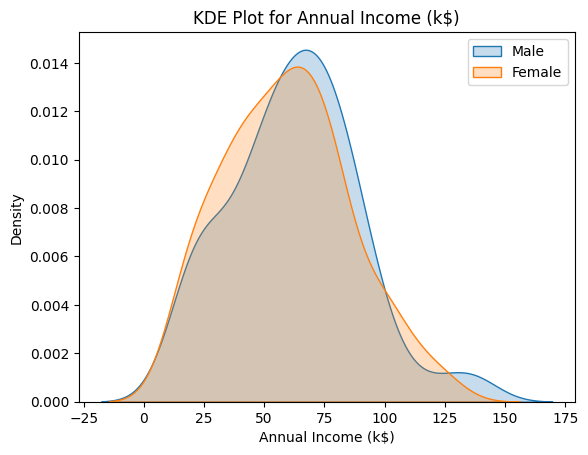

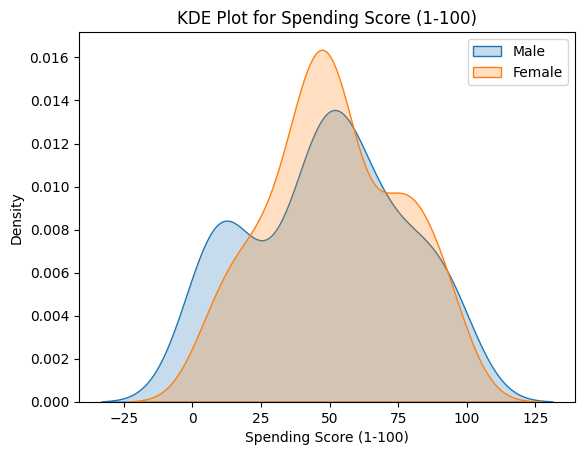

In [29]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Iterate through the columns and create KDE plots for each with different colors for gender
for i in columns:
    plt.figure()
    for gender in df['Gender'].unique():
        sns.kdeplot(df[df['Gender'] == gender][i], shade=True, label=gender)
    plt.title(f'KDE Plot for {i}')
    plt.legend()


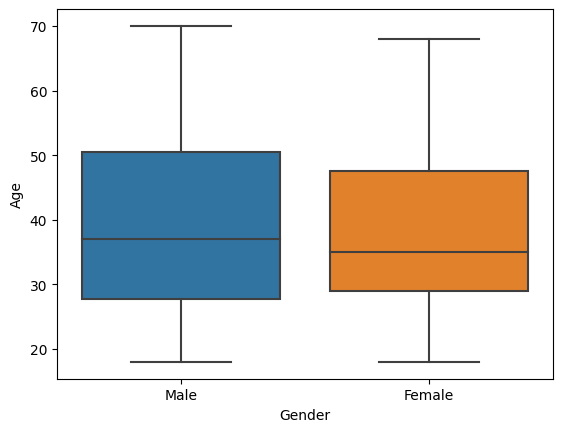

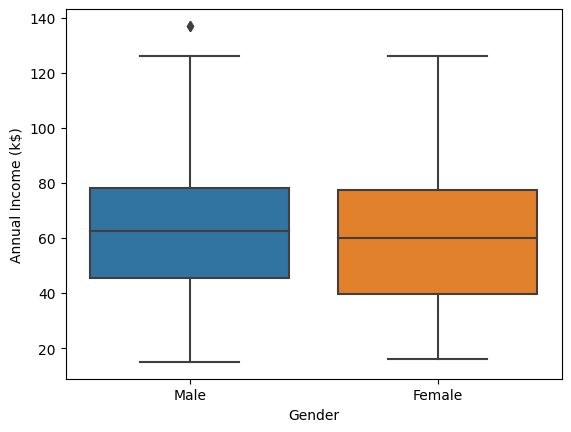

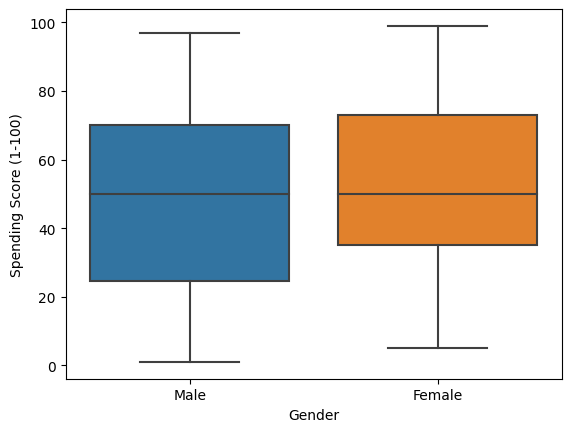

In [30]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [31]:
df['Gender'].value_counts(normalize=True)


Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

## Bivariate Analysis

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

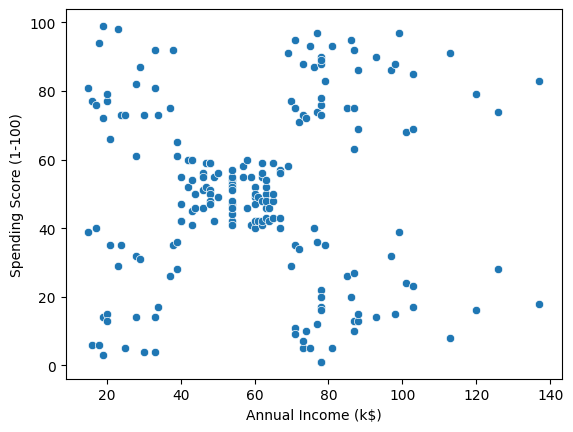

In [32]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )


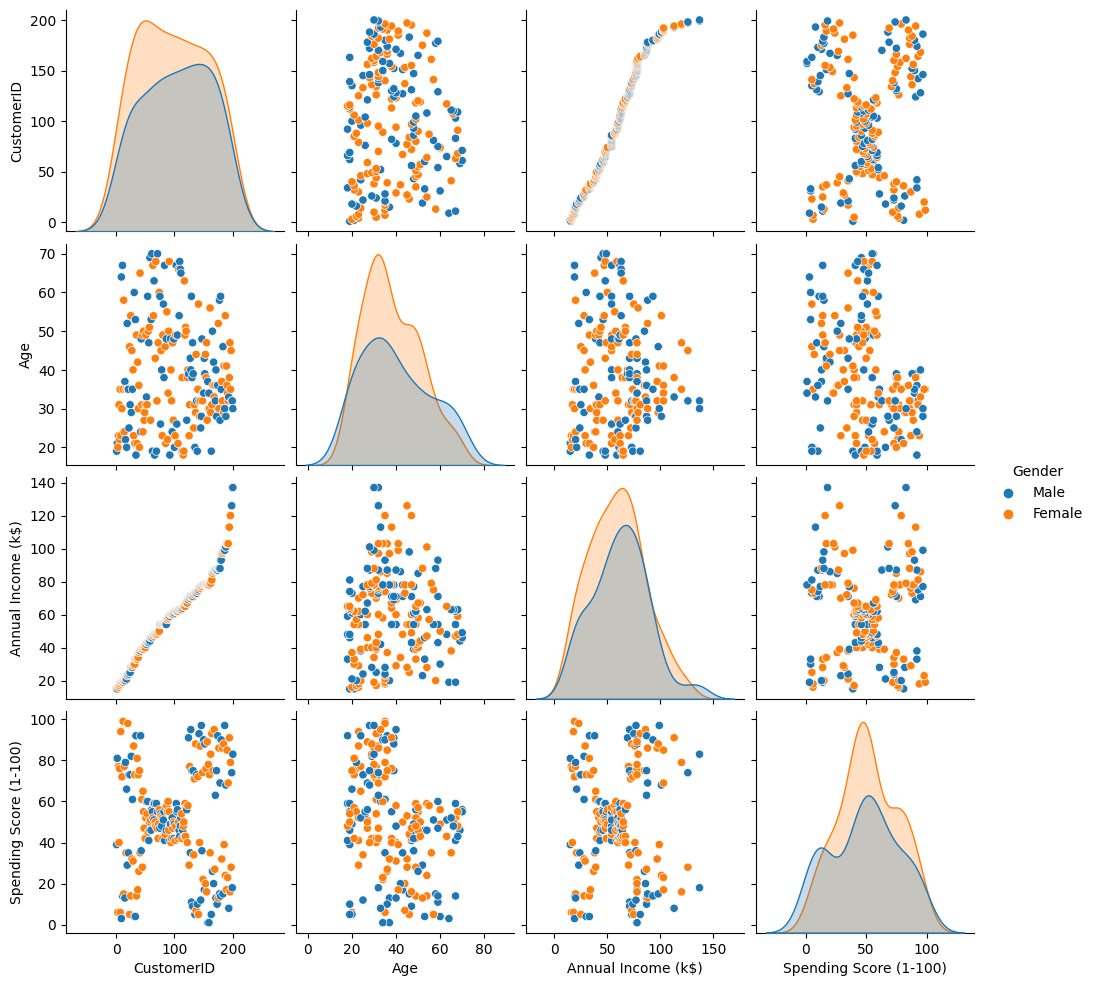

In [33]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [34]:
# Select the columns you want to calculate the mean for
selected_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Use the selected columns in the groupby operation and calculate the mean
mean_by_gender = df.groupby(['Gender'])[selected_columns].mean()

# Display the resulting DataFrame
print(mean_by_gender)


              Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                       
Female  38.098214           59.250000               51.526786
Male    39.806818           62.227273               48.511364


In [36]:
# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)


                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


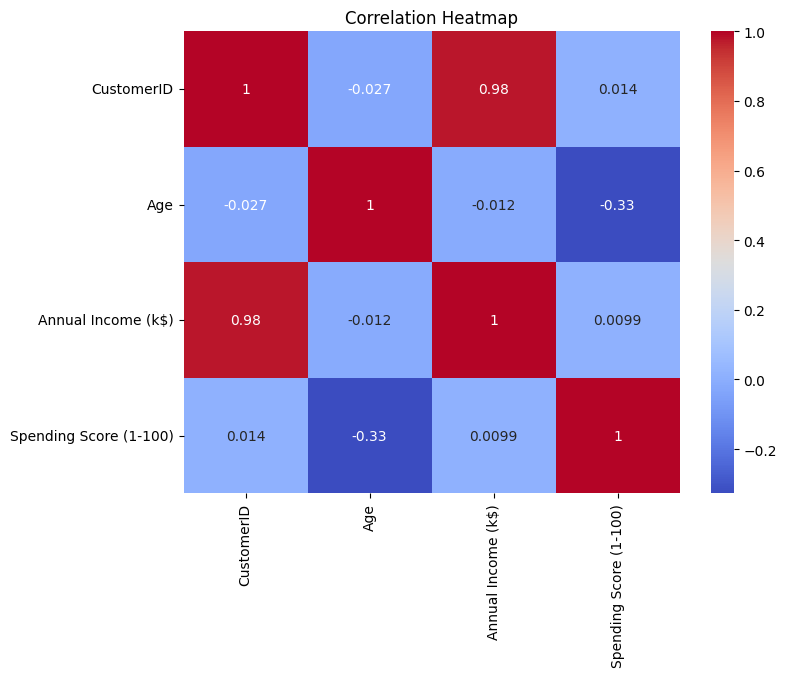

In [38]:
# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Clustering - Univariate, Bivariate and Multivariate 

In [ ]:
clustering1 = KMeans(n_clusters=3)
